# Chapter 16: HHL Algorithm

Harrow-Hassidim-Lloyd (HHL) algorithm for linear systems.

---


**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt
from Chapter16_HHL_functions import myHHL #type: ignore
from qiskit_aer import Aer
print('Setup complete!')

Setup complete!


## HHL Examples

In [2]:
example = 1
debug = False
nShots = 1000
if (example == 1):
	A = np.array([[1,0],[0,0.75]])
	v0 = np.array([0,1])
	v1 = np.array([1,0])
	D = [0.75,1]
	b = np.array([1/np.sqrt(2),1/np.sqrt(2)])
	lambdaUpper = 2
	m = 2
	P0 = 0.1
elif (example == 2):
	A = np.array([[2,-1],[-1,2]])
	v0 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
	v1 = np.array([1/np.sqrt(2),-1/np.sqrt(2)])
	D = [1,3]
	b = np.array([-1/np.sqrt(2),1/np.sqrt(2)])
	lambdaUpper = 6
	m = 5
	P0 = 0.1
elif (example == 3):
	A = np.array([[1,0,0,-0.5],[0,1,0,0],[0,0,1,0],[-0.5,0,0,1]])
	v0 = np.array([1/np.sqrt(2),0,0,1/np.sqrt(2)])
	v1 = np.array([0,1,0,0])
	v2 = np.array([0,0,1,0])
	v3 = np.array([1/np.sqrt(2),0,0,-1/np.sqrt(2)])
	D = [0.5,1,1,1.5]
	#a = [1/np.sqrt(4),1/np.sqrt(4),1/np.sqrt(4),1/np.sqrt(4)]
	a = [0,0,1,0]
	b = a[0]*v0 + a[1]*v1 + a[2]*v2 + a[3]*v3
	lambdaUpper = 3
	m = 2
	P0 = 0.1
	# Example for N-dimensional Poisson matrix
elif example == 4:
	N = 4  # dimension of the Poisson matrix
	A = 2 * np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1)
	# Dirichlet boundary conditions: b = [1, 0, ..., 0]
	b = np.zeros(N)
	b[0] = 1
	D = np.linalg.eigvalsh(A)
	lambdaUpper = np.max(D)
	m = 3
	P0 = 0.1

print('A:\n', A)
print('b:\n', b)

A:
 [[1.   0.  ]
 [0.   0.75]]
b:
 [0.70710678 0.70710678]


## HHL Execution on a specific QLSP

In [3]:
HHL = myHHL(A,b,lambdaUpper = lambdaUpper,
				 m = m,P0 = P0, nShots = nShots)
	
# Execute main code
if (HHL.executeHHL()):
	print("uHHL: \t\t\t", HHL.uHHL)
	HHL.solveuExact()
	print('uExact: \t\t', HHL.uExact)
	fidelity = np.dot(HHL.uHHL,HHL.uExact)
	print('fidelity:', fidelity)
	HHL.debugHHL()

λ_lower (Gershgorin): 0.750000
λ_lower (QPE): 0.495000
λ_lower (used): 0.742500
uHHL: 			 [0.82944532 0.55858792]
uExact: 		 [0.6 0.8]
fidelity: 0.9445375254063721
Exact eigen values of A:
 [1.   0.75]
Exact eigen vectors of A:
 [[1. 0.]
 [0. 1.]]
Exact eigenphases of A:
 [0.35355339 0.26516504]
xExact: [0.70710678 0.94280904]


## HHL fidelity vs nShots for varying qubits

Text(0, 0.5, 'Average fidelity')

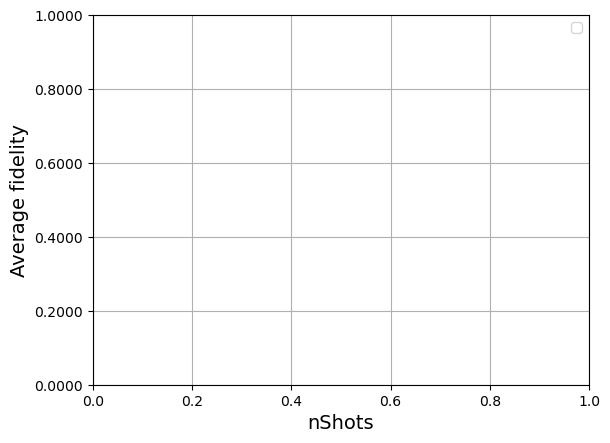

In [4]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()
shots = [10,25,50,100,500,1000]
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
mValues = [] #[2,3,5]
lineType = ['-','--',':','-.']
expt = 0
for m in mValues:
	fidelityResult= []
	print("m: ",m)
	for nShots in shots:
		print("nShots: ",nShots)
		fAverage = 0
		HHL = myHHL(A,b,lambdaUpper = lambdaUpper, m = m, P0 = P0, nShots = nShots)
		HHL.solveuExact()
		nSuccessfulTrials = 0
		nTrials = 25
		for t in range(nTrials):
			if (not HHL.executeHHL()):
				continue
			nSuccessfulTrials = nSuccessfulTrials +1
			fidelity = np.dot(HHL.uHHL,HHL.uExact)
			fAverage = fAverage + fidelity
		fAverage = fAverage/nSuccessfulTrials
		print("fAverage:", fAverage)
		fidelityResult.append(fAverage)
	
	plt.semilogx(shots, fidelityResult,lineType[expt])
	expt = expt +1

plt.legend(['m=2','m=3','m=5'])
plt.grid(visible = True)
plt.xlabel("nShots", fontsize = 14)
plt.ylabel("Average fidelity", fontsize = 14)

